In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


1 (0.5 pt.) Caricare in un dataframe le informazioni presenti nel foglio ‘customers’ del file BikeStores presenta al link 


In [ ]:
df = pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true','customers')
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0


2 (1 pt.) Visualizzare i nominativi dei clienti di cui non si conosce né il numero di telefono né la mail


In [ ]:
df[(df['phone'].isnull())&(df['email'].isnull())]

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
180,181,Olevia,Pitts,NaN,NaN,39 Fieldstone Drive,Redondo Beach,CA,90278.0
184,185,Morton,Lee,NaN,NaN,313 Ridge St.,San Angelo,TX,76901.0
238,239,Felice,Guzman,NaN,NaN,7 Creekside Lane,Canyon Country,CA,91387.0
239,240,Le,Deleon,NaN,NaN,58 Clark Court,Banning,CA,92220.0


3 (1 pt.) Visualizzare l’indirizzo dei clienti che usano gmail come propria mail personale


In [ ]:
dfemail = df[df['email'].str.contains('gmail',na=False)]['email']
dfemail

9        pamelia.newman@gmail.com
14        linnie.branch@gmail.com
20         tobie.little@gmail.com
21        adelle.larsen@gmail.com
24      regenia.vaughan@gmail.com
                  ...            
1428     lorrie.justice@gmail.com
1441       cassie.cline@gmail.com
1442        lezlie.lamb@gmail.com
1443       ivette.estes@gmail.com
1444      ester.acevedo@gmail.com
Name: email, Length: 304, dtype: object

4 (0.5 pt.) Eliminare la colonna customer_id dal dataframe


In [ ]:
df.drop(columns= 'customer_id')

,first_name,last_name,phone,email,street,city,state,zip_code
0,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...
1440,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0


5 (1.5 pt) Calcolare il numero di clienti per ogni stato e visualizzare queste informazioni in un pie chart. Dare un nome appropriato al titolo del grafico


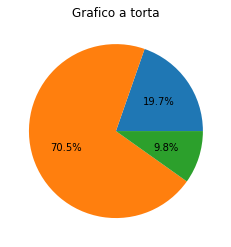

In [ ]:
df1 = df.groupby('state')['first_name'].count()
fig = plt.figure()
ax = plt.axes()
ax.set_title('Grafico a torta')
ax.pie(df1.values,autopct='%1.1f%%')
plt.show()

6 (1.5 pt) Calcolare il numero di clienti di ogni città. Visualizzare il nome della città e il numero di clienti che risiedono in quella città. Ordinare in ordine decrescente sul numero di clienti e visualizzare le informazioni in un grafico a barre orizzontali. Dare un nome appropriato al titolo del grafico e agli assi

In [ ]:
df2 = df.groupby('city',as_index= False)['first_name'].count().sort_values('first_name',ascending=False)
df2

,city,first_name
102,Mount Vernon,20
12,Ballston Spa,17
159,Scarsdale,17
23,Canandaigua,14
118,Ossining,13
...,...,...
49,Far Rockaway,2
173,Tonawanda,1
99,Middle Village,1
188,Westbury,1


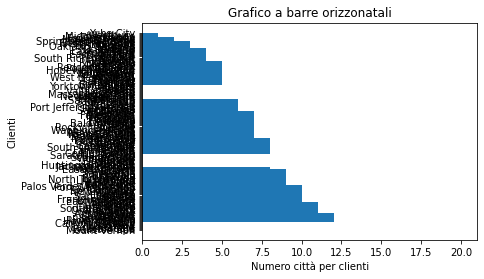

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.set_title('Grafico a barre orizzonatali')
ax.set_xlabel('Numero città per clienti')

ax.set_ylabel('Clienti')
ax.barh(df2['city'],df2['first_name'])
plt.show()

7 (1 pt.) Visualizzare le città che hanno un numero di clienti compreso tra 10 e 20. Visualizzare il nome della città e il numero di clienti.


In [ ]:
df2[(df2['first_name'] > 10)&(df2['first_name'] < 20)]

,city,first_name
12,Ballston Spa,17
159,Scarsdale,17
23,Canandaigua,14
118,Ossining,13
90,Longview,13
51,Floral Park,13
24,Canyon Country,12
98,Merrick,12
74,Howard Beach,12
137,Richmond Hill,12


8 (1 pt.) Calcolare il numero di città per ogni stato. Visualizzare il nome dello stato e il numero delle città


In [ ]:
df3 = df.groupby('state')['city'].count()
df3

state
CA     284
NY    1019
TX     142
Name: city, dtype: int64

9 (1 pt.) Eliminare dal dataframe tutti i clienti di Buffalo di cui non si conosce il telefono


In [ ]:
df4 = df.drop(df[(df['city'].str.contains('Buffalo'))&(df['phone'].isnull())].index)
df4

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0
